In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv', header=0)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<ipython-input-2-213a4029bf46>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], x='Survived', data=df, palette='viridis')
<ipython-input-2-213a4029bf46>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 1], x='Pclass', data=df, palette='viridis')
<ipython-input-2-213a4029bf46>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1, 0], x='Sex', data=df, palette='viridis')
<ipython-input-2-213a4029bf46>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

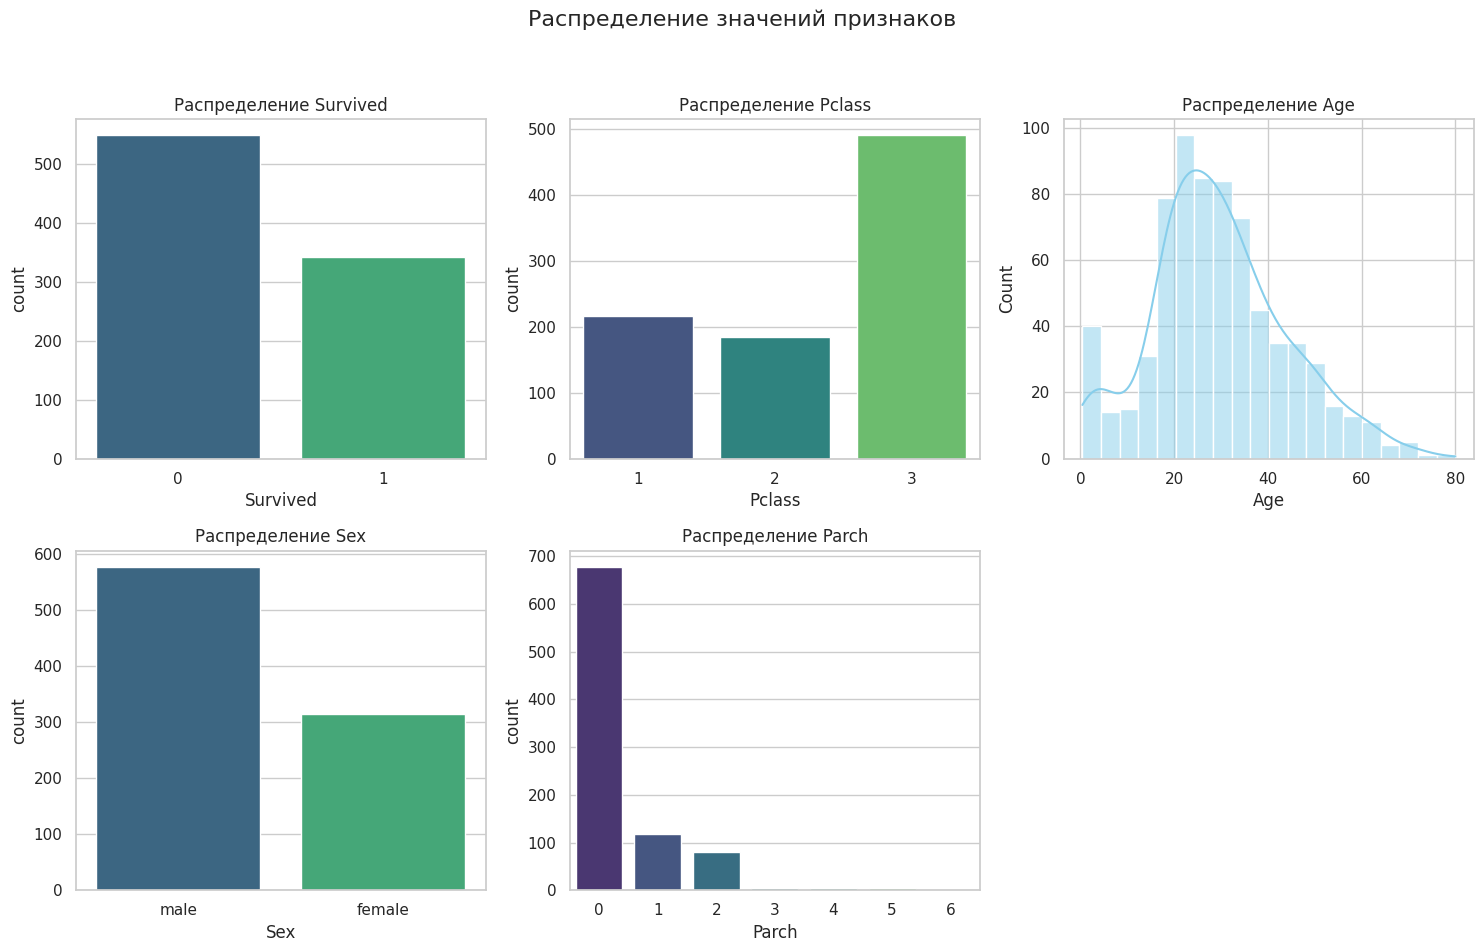

In [2]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Распределение значений признаков", fontsize=16)

sns.countplot(ax=axes[0, 0], x='Survived', data=df, palette='viridis')
axes[0, 0].set_title('Распределение Survived')

sns.countplot(ax=axes[0, 1], x='Pclass', data=df, palette='viridis')
axes[0, 1].set_title('Распределение Pclass')

sns.histplot(ax=axes[0, 2], x='Age', data=df, bins=20, kde=True, color="skyblue")
axes[0, 2].set_title('Распределение Age')

sns.countplot(ax=axes[1, 0], x='Sex', data=df, palette='viridis')
axes[1, 0].set_title('Распределение Sex')

sns.countplot(ax=axes[1, 1], x='Parch', data=df, palette='viridis')
axes[1, 1].set_title('Распределение Parch')

axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

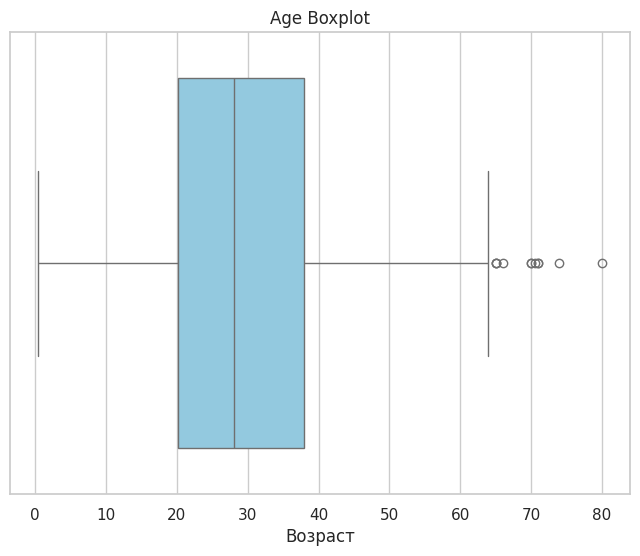

In [4]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'], color="skyblue")
plt.title("Age Boxplot")
plt.xlabel("Возраст")

plt.show()

#Интерпретация

Мы видим boxplot распределения возраста пассажиров Титаника. Линия внутри коробки указывает на медианное значение. Границы коробки указывают 25% и 75% процентили. Это означает, что половина пассажиров имела возраст от 20 до 38 лет. "Усы" графика показывают диапазон нормальных значений. Значения за ними (обозначены кружками) являются выбросами данной выборки.

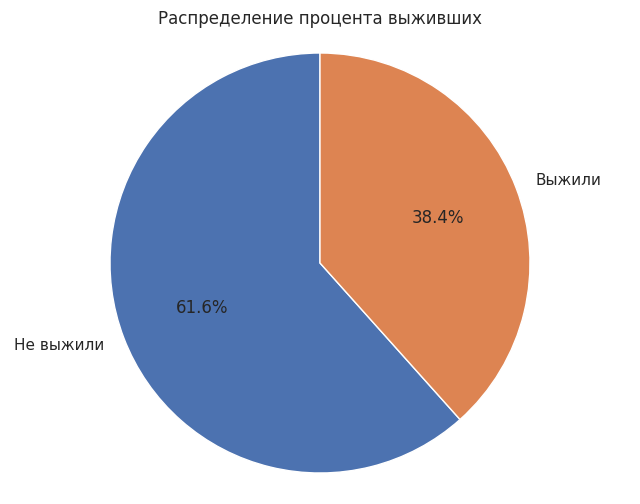

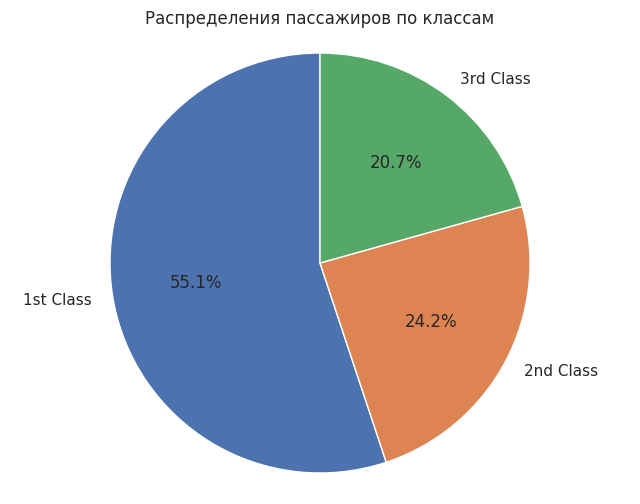

In [11]:
survived_counts = df['Survived'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(survived_counts, labels=['Не выжили', 'Выжили'], autopct='%1.1f%%', startangle=90)
plt.title('Распределение процента выживших')
plt.axis('equal')
plt.show()

pclass_counts = df['Pclass'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(pclass_counts, labels=['1st Class', '2nd Class', '3rd Class'], autopct='%1.1f%%', startangle=90)
plt.title('Распределения пассажиров по классам')
plt.axis('equal')
plt.show()

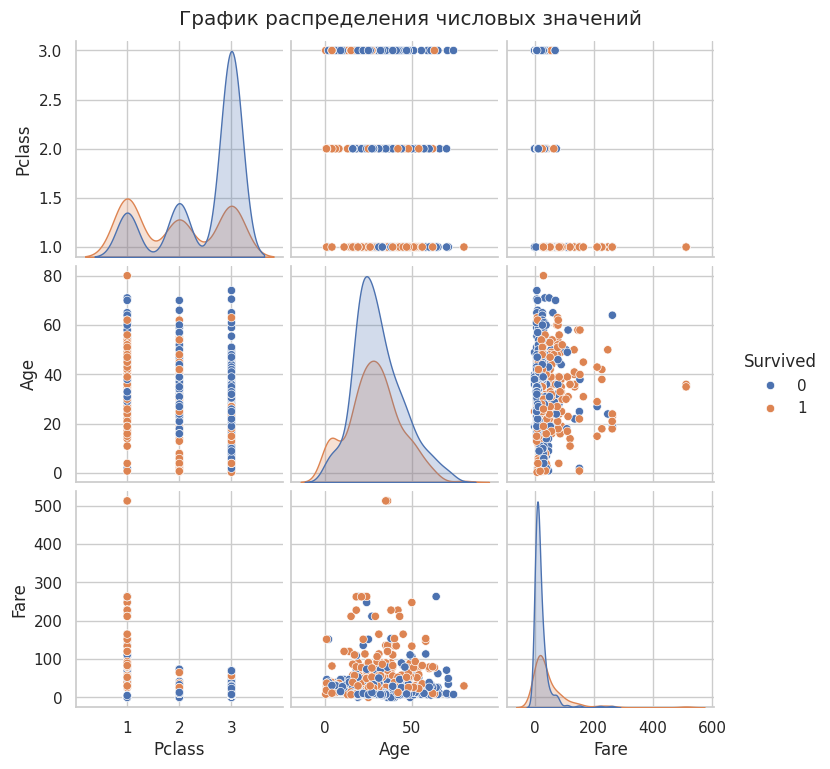

In [10]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], diag_kind='kde', hue='Survived')
plt.suptitle('График распределения числовых значений', y=1.02)
plt.show()

In [9]:
import plotly.express as px

sunburst_data = df.groupby(['Pclass', 'Sex']).size().reset_index(name='Count')

fig = px.sunburst(sunburst_data,
                  path=['Pclass', 'Sex'],
                  values='Count',
                  title="Интарактивный график распределения пассажиров по классу и полу")
fig.show()